<a href="https://colab.research.google.com/github/stenoe/BDOA/blob/main/Notebooks/example_middleware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple example of a middleware running in a cloud environment to extract data from some source

This example uploads the data, therfore these are not really big, just about 3 mln rows.

- We extract data on one city, clean the data for processing and transfer them from Farenheit to °C.

- We make a visualisation and give a sample statistics (descriptive)

- We control the memory usage in between.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading the data 
Here I just copied from Kaggle into a new directory called `data` and the file name was given as `city_temp.zip`

- Checking the dataframes memory usage and info about the content of the data file. 

**NOTE**: uncomment if you want to use this way!

In [ ]:
# https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities
# fn = "data/city_temp.zip"
# df = pd.read_csv(fn, compression='zip', low_memory=False) 
                    
# CHeck the memory usage                     
# df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 767.7 MB


## Alternative, use the Kaggle API

**NOTE:** You need an account for that! Create a `kaggle.json` file in the account settings.

Place the `kaggle.json` file created at into the notebook's directory and use `opendatasets` library.

In [13]:
# Check if opendatasets library is installed, if so - load it, if not - install it!
try:
  import opendatasets as od
except ImportError as e:
  !pip install opendatasets
  import opendatasets as od


In [19]:
od.download("https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities")
fn = "daily-temperature-of-major-cities/city_temperature.csv"
df = pd.read_csv(fn, low_memory=False) 
                    
# Check the memory usage                     
df.info(memory_usage="deep")

Skipping, found downloaded files in "./daily-temperature-of-major-cities" (use force=True to force download)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 767.7 MB


In [20]:
# Let's check out which data we have in Europe
df[df.Region=="Europe"].City.unique()

array(['Tirana', 'Vienna', 'Minsk', 'Brussels', 'Sofia', 'Zagreb',
       'Nicosia', 'Prague', 'Copenhagen', 'Helsinki', 'Paris', 'Bordeaux',
       'Bonn', 'Frankfurt', 'Hamburg', 'Munich', 'Tbilisi', 'Athens',
       'Budapest', 'Reykjavik', 'Dublin', 'Milan', 'Rome', 'Riga',
       'Skopje', 'Amsterdam', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest',
       'Moscow', 'Yerevan', 'Pristina', 'Bratislava', 'Barcelona',
       'Bilbao', 'Madrid', 'Stockholm', 'Bern', 'Geneva', 'Zurich',
       'Kiev', 'Belfast', 'London', 'Belgrade'], dtype=object)

In [21]:
# Check the temperatures
df.AvgTemperature.min(), df.AvgTemperature.max()

(-99.0, 110.0)

In [22]:
# Cleaning the data for what we want

# Let's use some city
df = df[df.City == "Reykjavik"]

# Use only timestamp and avg temperature
df = df[['Year', 'Month', 'Day', 'AvgTemperature']]

# filter for meaningful temperatures
df = df[df['AvgTemperature']>-70]

# create a datetime object and set as index
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) 
df = df.set_index(df['Date'])

#Select only the temperature
df = df[['AvgTemperature']]

# Transfer to °C
df['AvgTemperature'] = (df['AvgTemperature']-32)*5/9

## Visualise the data

Here we plot out the whole data (we could have done some more processing on them if needed. 

Also another check of the memory for the remaining data, and the dataframe's basic descriptive statistics of the data.

In a "virtual lab" scenario, we might use the results and send them now to the user back.

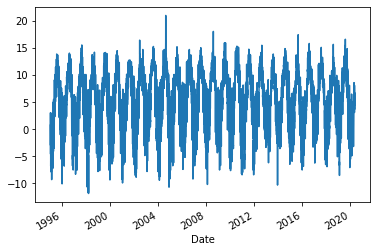

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9237 entries, 1995-01-01 to 2020-05-13
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AvgTemperature  9237 non-null   float64
dtypes: float64(1)
memory usage: 144.3 KB
None


,AvgTemperature
count,9237.000000
mean,5.290312
std,5.085667
min,-11.888889
25%,1.611111
50%,5.500000
75%,9.611111
max,20.944444


In [23]:
# Visualise the data
df['AvgTemperature'].plot()
plt.show()

print(df.info(memory_usage="deep"))
df.describe()